# simple linear regression
#### In this notebook we will using simple linear regression to predict National Income Per Capita In Canada Over The Period Of time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [3]:
df.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

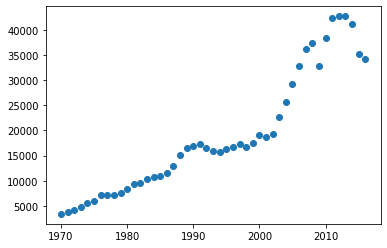

In [4]:
plt.scatter(x='year',y='per capita income (US$)',data=df)

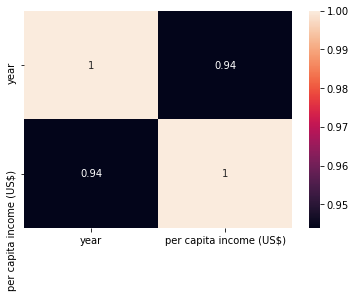

In [5]:
sns.heatmap(df.corr(),annot=True)

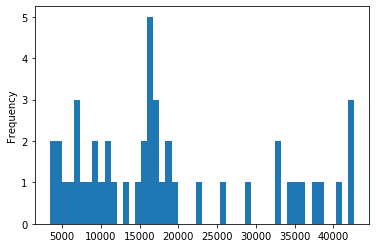

In [6]:
df['per capita income (US$)'].plot(kind='hist',bins= 50)

Text(0, 0.5, 'per capita income (US$)')

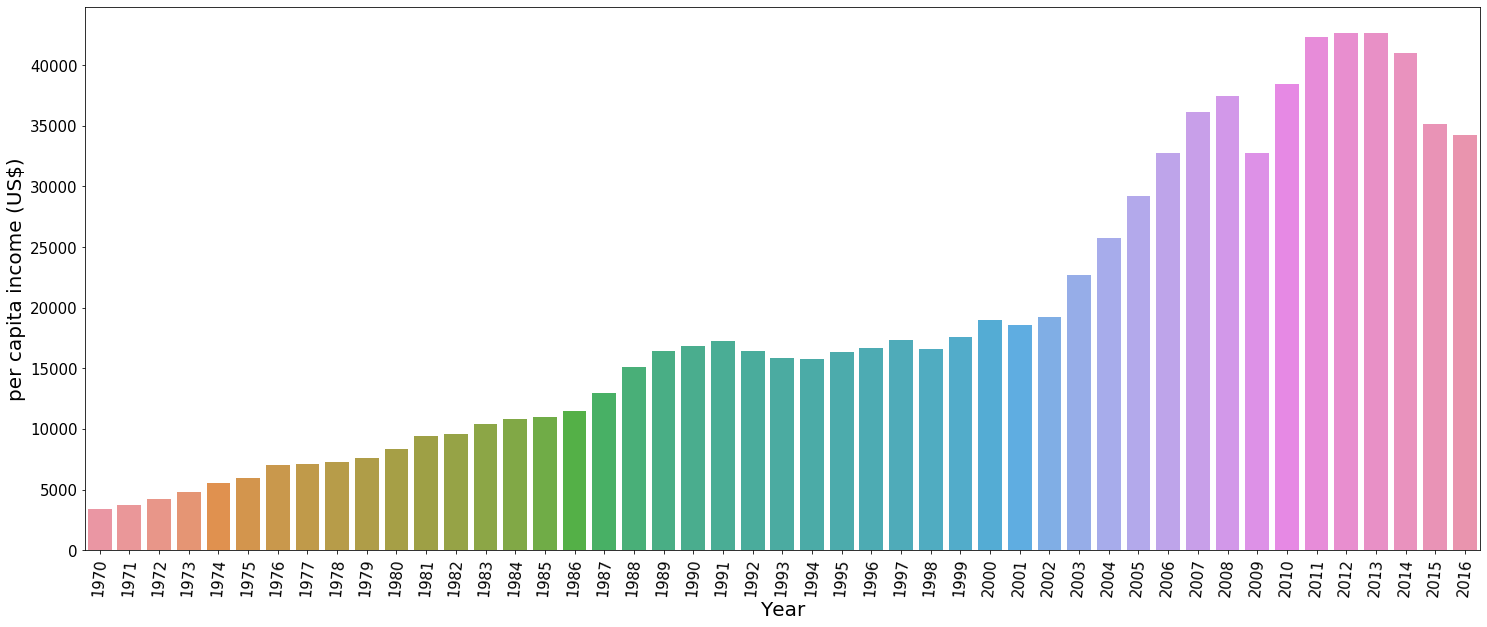

In [7]:
plt.figure(figsize=(25,10))
sns.barplot(df['year'],df['per capita income (US$)'] )
plt.xticks(rotation = 85,fontsize =15)
plt.xlabel('Year',fontsize='20')
plt.yticks(fontsize=15)
plt.ylabel('per capita income (US$)',fontsize=20)


In [8]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(df[['year']],df['per capita income (US$)'],test_size = .2,random_state = 0)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.score(x_test,y_test)

0.7622063756926367

In [11]:
y_pred = model.predict(x_test)
y_pred

array([23487.88766587, 27680.30003875, 25164.85261502,  3364.30827603,
       15103.0629201 ,  9233.68559806, 35226.64230994, 26003.3350896 ,
       18456.99281841,  8395.20312349])

In [12]:
x_test

,year
28,1998
33,2003
30,2000
4,1974
18,1988
11,1981
42,2012
31,2001
22,1992
10,1980


In [13]:
y_test

28    16622.671870
33    22739.426280
30    18987.382410
4      5576.514583
18    15080.283450
11     9434.390652
42    42665.255970
31    18601.397240
22    16412.083090
10     8355.968120
Name: per capita income (US$), dtype: float64

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test.values , y_pred)

0.7622063756926367

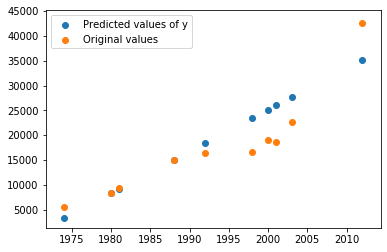

In [15]:
x = x_test.values
plt.figure()
plt.scatter(x , y_pred,label='Predicted values of y')
plt.scatter(x,y_test.values,label='Original values')
plt.legend()